In [1]:
import numpy as np
from sklearn.datasets import make_regression, make_classification, make_biclusters
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

In [403]:
n_samples = 1000
n_features = 5
n_targets = 1

X = np.random.uniform(low=-1, high=1, size=(n_samples, n_features))
w = np.random.uniform(low=-10, high=10, size=n_features)
bias = np.random.rand(1)

y_true = X.dot(w) + bias

# For linear Regression has noise should Gaussian because Maximum
# Likelyhood distribution is Gaussian

# add gaussain noise
# noise = np.random.normal(n_samples)
y_label = y_true 

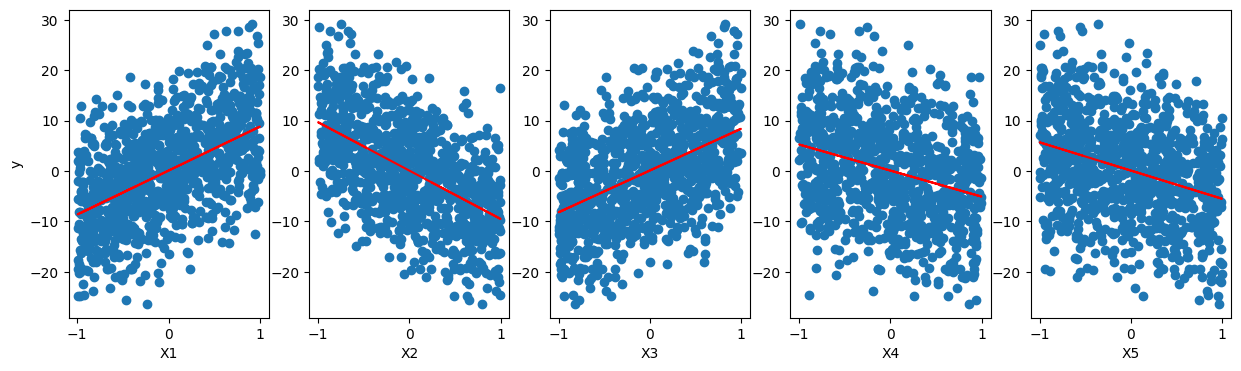

In [406]:

fig, axes = plt.subplots(1, len(X[0]), figsize=(15, 4))
axes[0].set_ylabel('y')
for i in range(len(X[0])):
    x = X[:, i]
    axes[i].scatter(x, y_label)
    axes[i].set_xlabel(f'X{i + 1}')
    axes[i].plot(x , w[i]*x+bias, color='r')
    
    
    

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

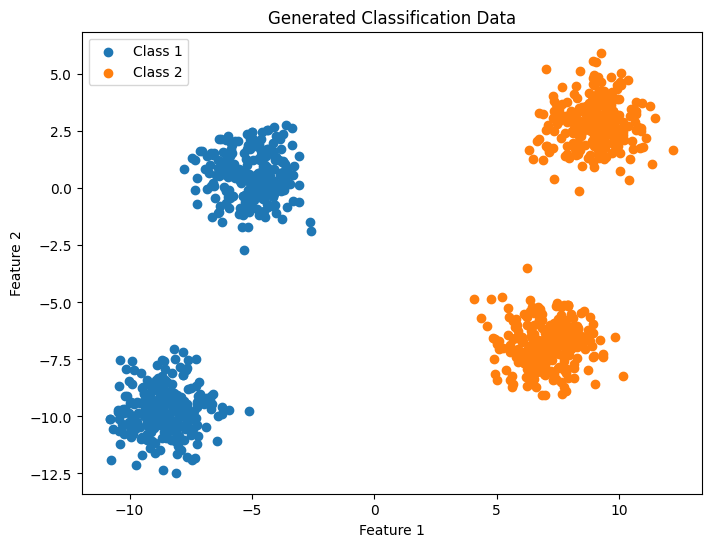

In [407]:

num_samples = 1000
num_features = 2
num_classes = 2
clusters_per_class = 2

X = np.zeros((num_samples, num_features))
y = np.zeros(num_samples, dtype=int)

for class_label in range(num_classes):
    centers = np.random.uniform(low=-10, high=10, size=(clusters_per_class, num_features))

    for cluster_index in range(clusters_per_class):
        start_idx = (class_label * clusters_per_class + cluster_index) * (num_samples // (num_classes * lusters_per_class))
        end_idx = start_idx + (num_samples // (num_classes * clusters_per_class))
        X[start_idx:end_idx] = np.random.randn(end_idx - start_idx, num_features) + centers[cluster_index]
        y[start_idx:end_idx] = class_label

plt.figure(figsize=(8, 6))
plt.title('Generated Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

for class_label in range(num_classes):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {class_label + 1}')

plt.legend()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

In [513]:
n_samples = 1000
n_features = 2
n_clusters = 4

X = np.zeros((n_samples, n_features))
def make_clusters(X, n_samples, n_features, n_clusters):
    centers = np.random.uniform(low=-15, high=15, size=(n_clusters, n_features))
    # Seperating centers little apart
    a = np.array([[-1, -1], [-2, 3], [3, -2], [3, 3]])
    centers +=a
    per_eachcluster = n_samples // n_clusters
    idx = 0
    for i in range(n_clusters):
        if (idx+per_eachcluster) < n_samples:
            X[idx : idx+per_eachcluster] = centers[i] + np.random.normal(-3, 3, size=(per_eachcluster, n_features))
            idx+=per_eachcluster
            
        else:
            X[idx:] = centers[i] + np.random.normal(-3, 3, size=(n_samples-idx, n_features))
        
    return X, centers

# Make clusters with respect to centers
X, centers = make_clusters(X, n_samples, n_features, n_clusters)

In [515]:
centers

array([[ -4.33030578, -14.3546183 ],
       [ -6.51716355,  13.65545837],
       [ 16.295346  ,   7.55074085],
       [ 16.08838272,  -3.03349476]])

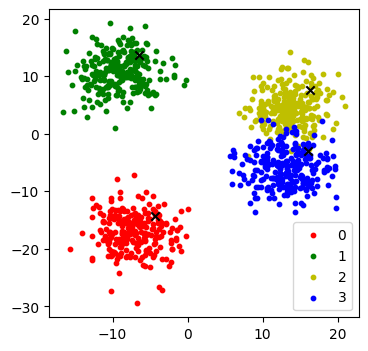

In [519]:
plt.figure(figsize=(4, 4))
# plt.scatter(X[:, 0], X[:, 1])
idx = 0
for i, color in enumerate(['r', 'g', 'y', 'b']):
    plt.scatter(X[idx:idx+250, 0], X[idx:idx+250, 1], c=color, s=10, label=f'{i}')
    plt.scatter(centers[i][0], centers[i][1], marker='x', color='k')
    idx+=250
plt.legend()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)
response

<Response [200]>


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
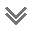

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

In [5]:
table = soup.find('table', id='main_table_countries_today')
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [9]:
headers = [header.text.strip() for header in table.find_all('th')]
headers[1:7]

['Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered']

In [10]:
data_rows = table.find_all('tr')[1:] 

In [11]:
data_rows[0]

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>131,889,132</td>
<td></td>
<td>1,695,941</td>
<td></td>
<td>127,665,129</td>
<td>+350</td>
<td>2,528,062</td>
<td>6,095</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [13]:
data = []
for row in data_rows:
    row_data = [td.text.strip() for td in row.find_all('td')]
    data.append(row_data)

In [81]:
df = pd.DataFrame(data, columns=headers)

In [82]:
covid = df[8:]

In [83]:
covid.set_index('#', inplace=True)

In [84]:
covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
#,,,,,,,,,,,,,,,,,,,,,
1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4
3,France,"40,138,560",,"167,642",,"39,970,918",,0,,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0,,,
4,Germany,"38,828,995",,"183,027",,"38,240,600",,"405,368",N/A,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1,,,"4,833"
5,Brazil,"38,743,918",,"711,380",,"36,249,161",,"1,783,377",N/A,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3,,,"8,281"


In [85]:
covid = covid.loc[:, 'Country,Other':'Population']

In [86]:
covid.reset_index(inplace=True)
covid.drop(columns=['#'], inplace=True)

In [87]:
covid.NewDeaths = 0
covid.NewCases = 0
covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
0,USA,"111,820,082",0,"1,219,487",0,"109,814,428",,"786,167",940,"333,985","3,642","1,186,851,502","3,544,901","334,805,269"
1,India,"45,035,393",0,"533,570",0,N/A,N/A,N/A,N/A,"32,016",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",0,"167,642",0,"39,970,918",,0,,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,828,995",0,"183,027",0,"38,240,600",,"405,368",N/A,"462,891","2,182","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,743,918",0,"711,380",0,"36,249,161",,"1,783,377",N/A,"179,908","3,303","63,776,166","296,146","215,353,593"


In [92]:
def convert_to_numeric(column):
    if column == '' or column == ' ' or column == 'N/A':
        return 0
    else:
        if column.find(',') != -1:
            column.replace(',', '')
            pd.to_numeric(column)
            
for column in covid.columns[1:]:
    if covid[column].dtype == 'int64':
        continue
    covid[column] = covid[column].str.replace(',', '').replace(' ', '0').replace('N/A', '0')
    covid[column] = covid[column].str.strip(' ')
    covid[column] = covid[column].str.strip('+')
    covid[column] = covid[column].str.strip('-')

            
    covid[column] = pd.to_numeric(covid[column])
        



In [93]:
covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
0,USA,111820082,0,1219487.0,0,109814428.0,NaN,786167,940.0,333985.0,3642.0,1.186852e+09,3544901.0,3.348053e+08
1,India,45035393,0,533570.0,0,0.0,0.0,0,0.0,32016.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,0,167642.0,0,39970918.0,NaN,0,NaN,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38828995,0,183027.0,0,38240600.0,NaN,405368,0.0,462891.0,2182.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38743918,0,711380.0,0,36249161.0,NaN,1783377,0.0,179908.0,3303.0,6.377617e+07,296146.0,2.153536e+08


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

In [557]:
classifacation_data = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_classes=2, weights=[0.05, 0.95])

In [559]:
class_x  = np.array(classifacation_data[0])
class_y  = np.array(classifacation_data[1])

In [580]:
from collections import Counter

Counter({1: 945, 0: 55})


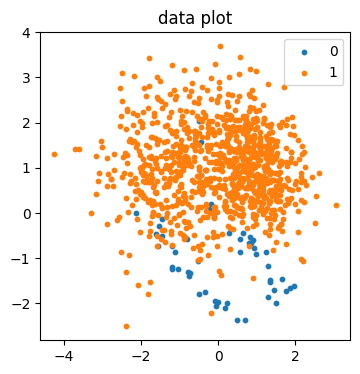

In [587]:
plt.figure(figsize=(4, 4))
for label in range(2):
    indices = np.where(class_y==label)[0]
    x = class_x[indices]
    plt.scatter(x[:, 0], x[:, 1], s=10, label=f'{label}')
plt.legend()
plt.title('data plot')
print(Counter(class_y))

Counter({1: 945, 0: 248})


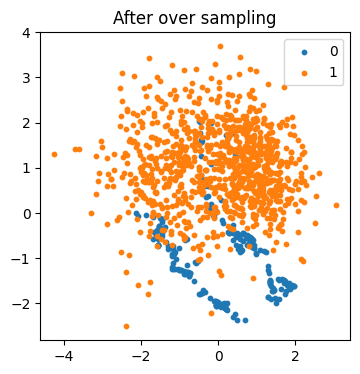

In [588]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(sampling_strategy= 25/95,random_state=42)
X_res_over, y_res_over = sm.fit_resample(class_x, class_y)
plt.figure(figsize=(4, 4))
for label in range(2):
    indices = np.where(y_res_over==label)[0]
    x = X_res_over[indices]
    plt.scatter(x[:, 0], x[:, 1], s=10, label=f'{label}')
plt.legend()
plt.title('After over sampling')
print(Counter(y_res_over))


Counter({1: 945, 0: 248})


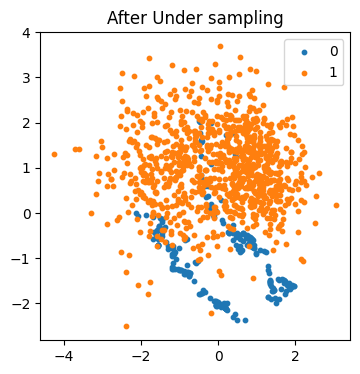

In [589]:
from imblearn.under_sampling import RandomUnderSampler

rm = RandomUnderSampler(sampling_strategy=15/95, random_state=42)
X_res_under, y_res_under = sm.fit_resample(class_x, class_y)
plt.figure(figsize=(4, 4))
for label in range(2):
    indices = np.where(y_res_under==label)[0]
    x = X_res_under[indices]
    plt.scatter(x[:, 0], x[:, 1], s=10, label=f'{label}')
plt.title('After Under sampling')
plt.legend()
print(Counter(y_res_under))

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [537]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [538]:
import pandas as pd

In [539]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [542]:
X_ = np.array(iris['data'])
y_ = np.array(iris['target'])

iris_dict = {c : X_[:, i] for i, c in enumerate(iris['feature_names'])}
iris_dict['target'] = y_
irisdf = pd.DataFrame(iris_dict)

In [543]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [550]:
irisdf.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [551]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y_, test_size=0.3)
print(f'training examples dimensions : {Xtrain.shape}')
print(f'test examples dimensions : {Xtest.shape}')

training examples dimensions : (105, 4)
test examples dimensions : (45, 4)


In [552]:
from sklearn.preprocessing import StandardScaler

std_x = StandardScaler()
std_Xtrain = std_x.fit_transform(Xtrain)
std_Xtrain = std_x.transform(Xtest)

In [553]:
print(std_Xtrain[:5])

[[-0.4220162  -1.309853    0.12758515  0.13109077]
 [-0.4220162  -1.54375532  0.01687076 -0.12861736]
 [-1.00353458  0.79526789 -1.25634464 -1.29730394]
 [-0.07310517 -0.84204836  0.18294234 -0.25847142]
 [-1.11983826  1.26307254 -1.31170184 -1.42715801]]
